# Aim-Predicting Probability of Default in Future/Credit Risk Management

In [1]:
#importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns', 120) 
pd.options.display.max_rows = 50
plt.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
XYZ_data = pd.read_csv(r"C:\Users\hp\Downloads\92141_214053_compressed_XYZCorp_LendingData.txt\XYZCorp_LendingData.txt",delimiter='\t')

# Step1- Exploratory Data Analysis

In [3]:
XYZ_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
XYZ_data.shape

(855969, 73)

In [5]:
XYZ_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [6]:
XYZ_data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
                                ...  
mths_since_l

In [7]:
XYZ_data["funded_amnt_inv"].isnull().sum()

0

In [8]:
XYZ_data2 = pd.DataFrame.copy(XYZ_data)

In [9]:
Joint = XYZ_data.groupby("application_type")["annual_inc_joint"].unique()
Joint

application_type
INDIVIDUAL                                                [nan]
JOINT         [94348.32, 182000.0, 89000.0, 95000.0, 111000....
Name: annual_inc_joint, dtype: object

In [10]:
Joint["JOINT"]

array([ 94348.32, 182000.  ,  89000.  ,  95000.  , 111000.  , 118000.  ,
        49000.  ,  70000.  , 150000.  , 132000.  ,  80000.  ,  62151.  ,
        88000.  , 175000.  ,  44600.  ,  96300.  ,  91000.  ,  58800.  ,
       156500.  ,  85000.  , 117492.  ,  44500.  ,  68712.  , 107000.  ,
       112194.  , 115000.  ,  93450.  ,  87000.  , 144000.  , 106400.  ,
        70308.  ,  83200.  , 103561.8 ,  90000.  , 123000.  , 148898.  ,
        72356.  ,  76201.  ,  55000.  , 141000.  , 208000.  ,  81000.  ,
        62000.  , 166000.  ,  94000.  ,  54696.  , 224000.  , 106000.  ,
       185000.  ,  77000.  ,  82000.  , 108000.  ,  84000.  , 146000.  ,
        58000.  ,  52000.  , 112000.  , 110000.  , 161200.  ,  88500.  ,
       120000.  , 145000.  , 128000.  ,  28000.  , 149000.  ,  72239.  ,
        76000.  ,  84700.  , 125200.  , 182407.  ,  85500.  , 139198.01,
        70500.  ,  73000.  ,  66600.  ,  78000.  , 260000.  , 146500.  ,
       105000.  , 107700.  , 176000.  ,  40034.  , 

In [11]:
Joint2 = XYZ_data.groupby("application_type")["dti_joint"].unique()
Joint2

application_type
INDIVIDUAL                                                [nan]
JOINT         [17.07, 6.44, 25.91, 23.99, 17.51, 13.83, 24.8...
Name: dti_joint, dtype: object

In [12]:
Joint2["JOINT"]

array([17.07,  6.44, 25.91, 23.99, 17.51, 13.83, 24.88,  6.81, 20.61,
       25.08, 18.16, 31.01, 21.37, 15.91, 39.5 , 17.18, 11.12, 20.82,
       13.  , 14.6 , 16.08, 20.22, 14.65, 27.11, 14.96, 13.88,  8.06,
       23.43, 26.76, 19.5 ,  8.36,  9.93, 21.04, 16.65, 12.92, 29.29,
       33.52, 15.5 , 18.71, 22.65, 22.56,  7.01, 25.35, 31.92, 18.94,
       37.81, 14.92,  6.47,  8.26, 19.15, 21.36, 18.74, 21.03, 20.2 ,
       32.61, 21.43, 24.41,  9.29, 19.06, 23.89, 23.07, 14.83, 12.18,
       14.26,  9.82, 15.76, 27.27, 33.01, 17.47,  5.31, 23.33, 38.19,
       16.86, 18.22, 29.23, 18.62, 27.21, 18.39, 12.02, 31.15, 10.5 ,
       30.21, 16.72, 29.49,  9.84, 31.4 , 12.41, 11.83, 23.08, 11.29,
       10.15, 22.33, 22.5 , 11.92, 13.09, 22.63, 24.02,  7.74, 23.47,
       28.97, 15.63, 12.19,  6.52, 28.46, 23.14,  7.87, 25.05, 18.31,
       18.46,   nan, 23.37, 23.26, 25.77, 11.85, 14.59, 19.78, 22.18,
       17.13,  6.17, 16.55, 32.8 , 14.5 , 17.59, 33.1 , 26.04, 26.16,
       23.24, 21.7 ,

In [13]:
print(XYZ_data["purpose"].unique())
print(XYZ_data["title"].unique())

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
['Computer' 'bike' 'real estate business' ... 'new kitchen for momma!'
 'New Baby and New House (CC Consolidate)' 'Credit Card/Auto Repair']


In [14]:
Joint3 = XYZ_data.groupby("application_type")["verification_status_joint"].unique()
Joint3

application_type
INDIVIDUAL                                        [nan]
JOINT         [Not Verified, Source Verified, Verified]
Name: verification_status_joint, dtype: object

In [15]:
XYZ_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [16]:
XYZ_data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

### Removing columns not required. Explanation given in excel

In [17]:
XYZ_data = XYZ_data.drop(["desc", "emp_title", "id", "member_id", "mths_since_last_delinq", "mths_since_last_major_derog", 
                          "mths_since_last_record", "next_pymnt_d", "sub_grade", "zip_code", "open_acc_6m", "open_il_6m", 
                          "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", 
                          "open_rv_24m", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", "inq_last_12m"], axis=1)


In [18]:
XYZ_data.shape

(855969, 49)

In [19]:
XYZ_data["total_rec_int"] = XYZ_data["total_rec_int"].astype(float) 
XYZ_data["total_rec_late_fee"] = XYZ_data["total_rec_late_fee"].astype(float) 
XYZ_data["total_rec_prncp"] = XYZ_data["total_rec_prncp"].astype(float) 
XYZ_data["funded_amnt"] = XYZ_data["funded_amnt"].astype(float) 
                                                                      

In [20]:
percent_recovered_tilldate1 = XYZ_data["total_rec_int"]+XYZ_data["total_rec_late_fee"]+XYZ_data["total_rec_prncp"]
percent_recovered_tilldate = (percent_recovered_tilldate1/XYZ_data["funded_amnt"])*100

In [21]:
XYZ_data["percent_recovered_tilldate"] = percent_recovered_tilldate
XYZ_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,percent_recovered_tilldate
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,117.221400
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,35.665200
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,125.152083
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,122.263000
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,108.072333


In [22]:
list = XYZ_data[XYZ_data.columns].corr()
list

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,percent_recovered_tilldate
loan_amnt,1.000000,0.999265,0.997601,0.142966,0.944870,0.335209,0.020189,-0.000739,-0.028928,0.198926,-0.082199,0.337489,0.119635,0.222084,0.639784,0.639786,0.479612,0.480328,0.395880,0.537586,0.025966,0.075513,0.055135,0.233596,-0.017042,NaN,0.475160,0.009429,0.003572,-0.004272,0.329130,0.312072,-0.004907,-0.107147
funded_amnt,0.999265,1.000000,0.998485,0.143116,0.945903,0.335002,0.020583,-0.000424,-0.029279,0.199432,-0.081858,0.337405,0.120147,0.222039,0.641706,0.641709,0.478290,0.479172,0.394669,0.536533,0.025579,0.075076,0.054898,0.233134,-0.016887,NaN,0.475160,0.009429,0.003675,-0.004272,0.329128,0.312071,-0.005797,-0.109247
funded_amnt_inv,0.997601,0.998485,1.000000,0.143374,0.944149,0.334356,0.021489,0.000050,-0.030462,0.200055,-0.081008,0.336870,0.120931,0.222258,0.644011,0.644023,0.474600,0.478589,0.391010,0.534517,0.023091,0.073737,0.053082,0.232029,-0.016556,NaN,0.475524,0.009044,0.003856,-0.004271,0.329152,0.312107,-0.008209,-0.112525
int_rate,0.142966,0.143116,0.143374,1.000000,0.130468,-0.073825,0.078454,0.055400,0.231705,-0.011091,0.052596,-0.035344,0.271687,-0.039482,0.033933,0.033790,0.173387,0.174453,0.059298,0.446517,0.050743,0.110848,0.074360,0.107346,0.012841,NaN,-0.086210,0.272316,0.026476,0.001129,-0.091430,-0.165533,0.155037,0.106775
installment,0.944870,0.945903,0.944149,0.130468,1.000000,0.328578,0.013909,0.007224,0.001659,0.183817,-0.071114,0.320017,0.131928,0.199872,0.539840,0.539835,0.520613,0.521332,0.455444,0.502038,0.035728,0.076931,0.057180,0.243246,-0.014565,NaN,0.437515,-0.010689,0.006273,-0.003540,0.298352,0.286857,0.004753,-0.041078
annual_inc,0.335209,0.335002,0.334356,-0.073825,0.328578,1.000000,-0.086821,0.047749,0.037251,0.139429,-0.008909,0.298569,0.036753,0.188651,0.211549,0.211591,0.163226,0.163275,0.152245,0.130367,0.009864,0.007613,0.006805,0.092662,-0.003789,NaN,0.674815,-0.066026,0.014877,0.001005,0.422618,0.271059,-0.037066,-0.026623
dti,0.020189,0.020583,0.021489,0.078454,0.013909,-0.086821,1.000000,-0.002677,-0.005860,0.142068,-0.022717,0.067119,0.086649,0.106266,0.058057,0.058021,-0.040537,-0.039563,-0.050855,0.008750,-0.006245,0.001719,0.002923,-0.028601,-0.000117,NaN,0.006812,0.005000,0.003227,-0.001995,-0.007133,0.032430,0.004429,-0.071974
delinq_2yrs,-0.000739,-0.000424,0.000050,0.055400,0.007224,0.047749,-0.002677,1.000000,0.022930,0.051502,-0.011081,-0.031807,-0.016299,0.121978,0.030884,0.030874,-0.031777,-0.031346,-0.038068,0.001380,0.013992,-0.000252,0.001467,-0.018805,0.063019,NaN,0.111152,-0.017813,0.130420,0.000154,0.064618,-0.040575,-0.009186,-0.045756
inq_last_6mths,-0.028928,-0.029279,-0.030462,0.231705,0.001659,0.037251,-0.005860,0.022930,1.000000,0.116532,0.059430,-0.018683,-0.088353,0.141854,-0.104062,-0.104083,0.080476,0.079531,0.065010,0.088495,0.022820,0.044004,0.029647,0.065455,0.007364,NaN,-0.006847,0.034308,-0.004836,0.003181,0.034806,0.006089,0.074407,0.113472
open_acc,0.198926,0.199432,0.200055,-0.011091,0.183817,0.139429,0.142068,0.051502,0.116532,1.000000,-0.026122,0.225858,-0.144959,0.694850,0.171050,0.171053,0.043452,0.044552,0.032115,0.061725,-0.009957,0.001957,0.003990,0.029130,0.009998,NaN,0.272801,0.261518,0.017774,0.000071,0.244465,0.325179,-0.021698,-0.087750


In [23]:
list = XYZ_data[XYZ_data.columns].corr()['default_ind'][:]
list

loan_amnt                    -0.004907
funded_amnt                  -0.005797
funded_amnt_inv              -0.008209
int_rate                      0.155037
installment                   0.004753
annual_inc                   -0.037066
dti                           0.004429
delinq_2yrs                  -0.009186
inq_last_6mths                0.074407
open_acc                     -0.021698
pub_rec                      -0.019607
revol_bal                    -0.020696
revol_util                    0.044497
total_acc                    -0.021087
out_prncp                    -0.225960
out_prncp_inv                -0.225959
total_pymnt                  -0.039220
total_pymnt_inv              -0.040232
total_rec_prncp              -0.090336
total_rec_int                 0.046050
total_rec_late_fee            0.140760
recoveries                    0.475738
collection_recovery_fee       0.330764
last_pymnt_amnt              -0.087217
collections_12_mths_ex_med   -0.010650
policy_code              

In [24]:
XYZ_data.shape

(855969, 50)

In [25]:
list1 = []
for i in range(len(list)):
    if list[i]<0.02 and list[i]>(-0.02):
        list1.append(list.index[i])

In [26]:
for i in range(len(list1)):
    del XYZ_data['{}'.format(list1[i])]

In [27]:
XYZ_data.shape

(855969, 40)

In [28]:
XYZ_data.columns

Index(['term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'title', 'addr_state', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind',
       'percent_recovered_tilldate'],
      dtype='object')

In [29]:
XYZ_data.isnull().sum()

term                               0
int_rate                           0
grade                              0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
addr_state                         0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
revol_bal                          0
revol_util                       446
total_acc                          0
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
c

In [30]:
XYZ_data['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

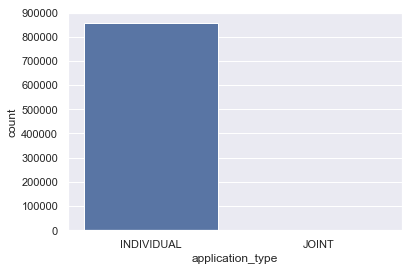

In [31]:
sns.countplot('application_type',data=XYZ_data)

In [32]:
XYZ_data.loc[XYZ_data['application_type']=='JOINT'].index

Int64Index([452290, 452477, 453477, 453733, 453789, 453802, 453855, 454008,
            454088, 454283,
            ...
            542999, 545591, 546637, 546669, 547389, 548057, 548365, 548505,
            549873, 550079],
           dtype='int64', length=442)

In [33]:
XYZ_data[452477:]

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,total_rev_hi_lim,default_ind,percent_recovered_tilldate
452477,36 months,8.49,B,10+ years,MORTGAGE,86000.0,Source Verified,Dec-2015,n,debt_consolidation,NaN,CA,Jan-1989,0.0,8.0,17372.0,52.3,12.0,w,34142.92,33899.04,947.88,941.11,857.08,90.80,0.0,0.0,0.0,Jan-2016,989.15,Dec-2015,1.0,JOINT,182000.0,6.44,Not Verified,603144.0,33200.0,0,2.708229
452478,36 months,10.78,B,4 years,MORTGAGE,105000.0,Verified,Dec-2015,n,debt_consolidation,Debt consolidation,NJ,Jan-1996,0.0,10.0,24125.0,73.0,26.0,w,29290.46,29290.46,799.37,799.37,709.54,89.83,0.0,0.0,0.0,Jan-2016,844.29,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,458526.0,32960.0,0,2.664567
452479,36 months,15.77,D,9 years,MORTGAGE,85000.0,Source Verified,Dec-2015,n,debt_consolidation,Debt consolidation,PA,May-2001,1.0,12.0,35435.0,67.4,55.0,w,0.00,0.00,35199.32,35199.32,35000.00,199.32,0.0,0.0,0.0,Jan-2016,35229.98,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,228189.0,52600.0,0,100.569486
452480,60 months,13.44,C,4 years,MORTGAGE,135000.0,Not Verified,Dec-2015,n,home_improvement,Home improvement,MN,Jun-2004,1.0,18.0,9146.0,36.4,63.0,w,21600.00,21600.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,360708.0,25100.0,0,0.000000
452481,36 months,10.78,B,< 1 year,RENT,65000.0,Source Verified,Dec-2015,n,credit_card,Credit card refinancing,CA,Apr-2003,1.0,12.0,16285.0,55.2,26.0,w,14645.24,14645.24,399.68,399.68,354.76,44.92,0.0,0.0,0.0,Jan-2016,422.14,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,25044.0,29500.0,0,2.664533
452482,36 months,7.49,A,10+ years,MORTGAGE,107111.0,Source Verified,Dec-2015,n,debt_consolidation,Debt consolidation,MD,Mar-1999,0.0,11.0,43779.0,56.0,18.0,f,29254.20,29254.20,826.94,826.94,745.80,81.14,0.0,0.0,0.0,Jan-2016,858.15,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,112683.0,96600.0,0,2.756467
452483,36 months,8.49,B,< 1 year,MORTGAGE,58000.0,Source Verified,Dec-2015,n,credit_card,Credit card refinancing,TX,Apr-2003,0.0,9.0,8254.0,60.7,30.0,w,9755.12,9755.12,280.25,280.25,244.88,35.37,0.0,0.0,0.0,Jan-2016,284.97,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,194178.0,13600.0,0,2.802500
452484,36 months,5.32,A,8 years,MORTGAGE,77000.0,Not Verified,Dec-2015,n,debt_consolidation,Debt consolidation,GA,Jan-2001,0.0,19.0,15799.0,17.1,42.0,w,11691.83,11691.83,334.77,334.77,308.17,26.60,0.0,0.0,0.0,Jan-2016,338.32,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,34013.0,92600.0,0,2.789750
452485,60 months,11.48,B,10+ years,RENT,52000.0,Not Verified,Dec-2015,n,debt_consolidation,Debt consolidation,CA,Mar-1999,0.0,12.0,3861.0,12.5,20.0,w,21000.00,21000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,Jan-2016,408.06,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,75579.0,30800.0,0,0.000000
452486,60 months,23.13,F,10+ years,RENT,60000.0,Verified,Dec-2015,n,credit_card,NaN,WA,Sep-1999,1.0,14.0,23300.0,93.2,36.0,w,23784.23,23784.23,447.07,447.07,215.77,231.30,0.0,0.0,0.0,Jan-2016,477.91,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,NaN,76573.0,25000.0,0,1.862792


In [34]:
XYZ_data["indi_or_joint_inc"] = XYZ_data["annual_inc"]

In [35]:
XYZ_data["indi_or_joint_inc"] = XYZ_data.apply(lambda x: x["annual_inc_joint"] 
                                                                   if (x["application_type"] == "JOINT") 
                                                                   else x["annual_inc"], axis=1)

In [36]:
XYZ_data = XYZ_data.drop(["annual_inc", "annual_inc_joint", "dti_joint", "verification_status_joint","title"], axis=1)

In [37]:
XYZ_data.head()

,term,int_rate,grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,tot_cur_bal,total_rev_hi_lim,default_ind,percent_recovered_tilldate,indi_or_joint_inc
0,36 months,10.65,B,10+ years,RENT,Verified,Dec-2011,n,credit_card,AZ,Jan-1985,1.0,3.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0,117.221400,24000.0
1,60 months,15.27,C,< 1 year,RENT,Source Verified,Dec-2011,n,car,GA,Apr-1999,5.0,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,1.0,INDIVIDUAL,NaN,NaN,1,35.665200,30000.0
2,36 months,15.96,C,10+ years,RENT,Not Verified,Dec-2011,n,small_business,IL,Nov-2001,2.0,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0,125.152083,12252.0
3,36 months,13.49,C,10+ years,RENT,Source Verified,Dec-2011,n,other,CA,Feb-1996,1.0,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,1.0,INDIVIDUAL,NaN,NaN,0,122.263000,49200.0
4,60 months,12.69,B,1 year,RENT,Source Verified,Dec-2011,n,other,OR,Jan-1996,0.0,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0,108.072333,80000.0


In [38]:
XYZ_data.shape

(855969, 36)

In [39]:
XYZ_data.isnull().sum()

term                              0
int_rate                          0
grade                             0
emp_length                    43061
home_ownership                    0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
addr_state                        0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_d                   8862
last_pymnt_amnt             

# Treating Missing Values

In [40]:
XYZ_data['revol_util'].fillna(XYZ_data['revol_util'].mean(),inplace=True)
XYZ_data['emp_length'].fillna(0, inplace=True)
XYZ_data['tot_cur_bal'].fillna(XYZ_data['tot_cur_bal'].mean(),inplace=True)
XYZ_data['total_rev_hi_lim'].fillna(XYZ_data['total_rev_hi_lim'].mean(),inplace=True)
XYZ_data['last_pymnt_d'].fillna("Not given", inplace=True)
XYZ_data['last_credit_pull_d'].fillna("Not given", inplace=True)

In [41]:
XYZ_data.columns

Index(['term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind', 'percent_recovered_tilldate',
       'indi_or_joint_inc'],
      dtype='object')

In [42]:
XYZ_data.isnull().sum()

term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
policy_code                   0
application_type              0
tot_cur_

In [43]:
XYZ_data['pymnt_plan'].value_counts()
    

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [44]:
del XYZ_data['pymnt_plan']

In [45]:
XYZ_data['addr_state'].value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
       ...  
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, Length: 51, dtype: int64

In [46]:
del XYZ_data['addr_state']

In [47]:
XYZ_data['policy_code'].value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [48]:
del XYZ_data['policy_code']

In [49]:
XYZ_data['home_ownership'] = np.where(XYZ_data['home_ownership']=='NONE', 'OTHER', XYZ_data['home_ownership'])
XYZ_data['home_ownership'] = np.where(XYZ_data['home_ownership']=='ANY', 'OTHER', XYZ_data['home_ownership'])

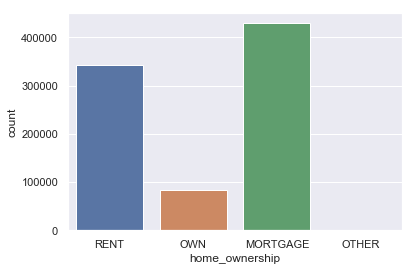

In [50]:
sns.countplot('home_ownership',data=XYZ_data)

In [51]:
XYZ_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 0],
      dtype=object)

In [52]:
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='10+ years', 10, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='9 years', 9, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='8 years', 8, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='7 years', 7, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='6 years', 6, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='5 years', 5, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='4 years', 4, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='3 years', 3, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='2 years', 2, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='1 year', 1, XYZ_data['emp_length'])
XYZ_data['emp_length'] = np.where(XYZ_data['emp_length']=='< 1 year', 0, XYZ_data['emp_length'])
XYZ_data["emp_length"] = XYZ_data["emp_length"].astype(int) 

In [53]:
XYZ_data["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

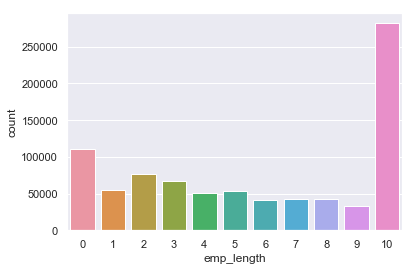

In [54]:
sns.countplot('emp_length',data=XYZ_data)

In [55]:
XYZ_data['grade'] = np.where(XYZ_data['grade']=='A', 1, XYZ_data['grade'])
XYZ_data['grade'] = np.where(XYZ_data['grade']=='B', 2, XYZ_data['grade'])
XYZ_data['grade'] = np.where(XYZ_data['grade']=='C', 3, XYZ_data['grade'])
XYZ_data['grade'] = np.where(XYZ_data['grade']=='D', 4, XYZ_data['grade'])
XYZ_data['grade'] = np.where(XYZ_data['grade']=='E', 5, XYZ_data['grade'])
XYZ_data['grade'] = np.where(XYZ_data['grade']=='F', 6, XYZ_data['grade'])
XYZ_data['grade'] = np.where(XYZ_data['grade']=='G', 7, XYZ_data['grade'])
XYZ_data["grade"] = XYZ_data["grade"].astype(int) 

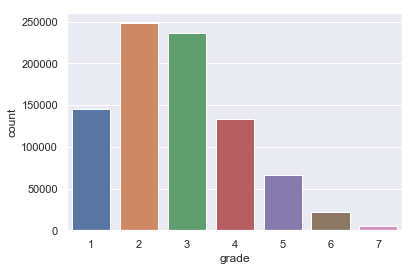

In [56]:
sns.countplot('grade',data=XYZ_data)

In [57]:
XYZ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 33 columns):
term                          855969 non-null object
int_rate                      855969 non-null float64
grade                         855969 non-null int32
emp_length                    855969 non-null int32
home_ownership                855969 non-null object
verification_status           855969 non-null object
issue_d                       855969 non-null object
purpose                       855969 non-null object
earliest_cr_line              855969 non-null object
inq_last_6mths                855969 non-null float64
open_acc                      855969 non-null float64
revol_bal                     855969 non-null float64
revol_util                    855969 non-null float64
total_acc                     855969 non-null float64
initial_list_status           855969 non-null object
out_prncp                     855969 non-null float64
out_prncp_inv                 855969

In [58]:
XYZ_data['last_pymnt_d'] = np.where(XYZ_data['last_pymnt_d']=='Not given', '', XYZ_data['last_pymnt_d'])
XYZ_data['last_credit_pull_d'] = np.where(XYZ_data['last_credit_pull_d']=='Not given', '', XYZ_data['last_credit_pull_d'])

In [59]:
import datetime
XYZ_data['last_pymnt_d'] = pd.to_datetime(XYZ_data['last_pymnt_d'])
XYZ_data['last_credit_pull_d'] = pd.to_datetime(XYZ_data['last_credit_pull_d'])
XYZ_data['earliest_cr_line'] = pd.to_datetime(XYZ_data['earliest_cr_line'])
XYZ_data['issue_d'] = pd.to_datetime(XYZ_data['issue_d'])

In [60]:
XYZ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 33 columns):
term                          855969 non-null object
int_rate                      855969 non-null float64
grade                         855969 non-null int32
emp_length                    855969 non-null int32
home_ownership                855969 non-null object
verification_status           855969 non-null object
issue_d                       855969 non-null datetime64[ns]
purpose                       855969 non-null object
earliest_cr_line              855969 non-null datetime64[ns]
inq_last_6mths                855969 non-null float64
open_acc                      855969 non-null float64
revol_bal                     855969 non-null float64
revol_util                    855969 non-null float64
total_acc                     855969 non-null float64
initial_list_status           855969 non-null object
out_prncp                     855969 non-null float64
out_prncp_inv       

In [67]:
XYZ_data.head()

,term,int_rate,grade,emp_length,home_ownership,verification_status,issue_d,purpose,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,tot_cur_bal,total_rev_hi_lim,default_ind,percent_recovered_tilldate,indi_or_joint_inc
0,36 months,10.65,2,10,RENT,Verified,2011-12-01,credit_card,1985-01-01,1.0,3.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,INDIVIDUAL,139766.247529,32163.574526,0,117.221400,24000.0
1,60 months,15.27,3,0,RENT,Source Verified,2011-12-01,car,1999-04-01,5.0,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,INDIVIDUAL,139766.247529,32163.574526,1,35.665200,30000.0
2,36 months,15.96,3,10,RENT,Not Verified,2011-12-01,small_business,2001-11-01,2.0,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,INDIVIDUAL,139766.247529,32163.574526,0,125.152083,12252.0
3,36 months,13.49,3,10,RENT,Source Verified,2011-12-01,other,1996-02-01,1.0,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,INDIVIDUAL,139766.247529,32163.574526,0,122.263000,49200.0
4,60 months,12.69,2,1,RENT,Source Verified,2011-12-01,other,1996-01-01,0.0,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,INDIVIDUAL,139766.247529,32163.574526,0,108.072333,80000.0


In [62]:
XYZ_data['last_pymnt_d'].fillna(XYZ_data.mode()['last_pymnt_d'][0],inplace=True)
XYZ_data['last_credit_pull_d'].fillna(XYZ_data.mode()['last_credit_pull_d'][0],inplace=True)

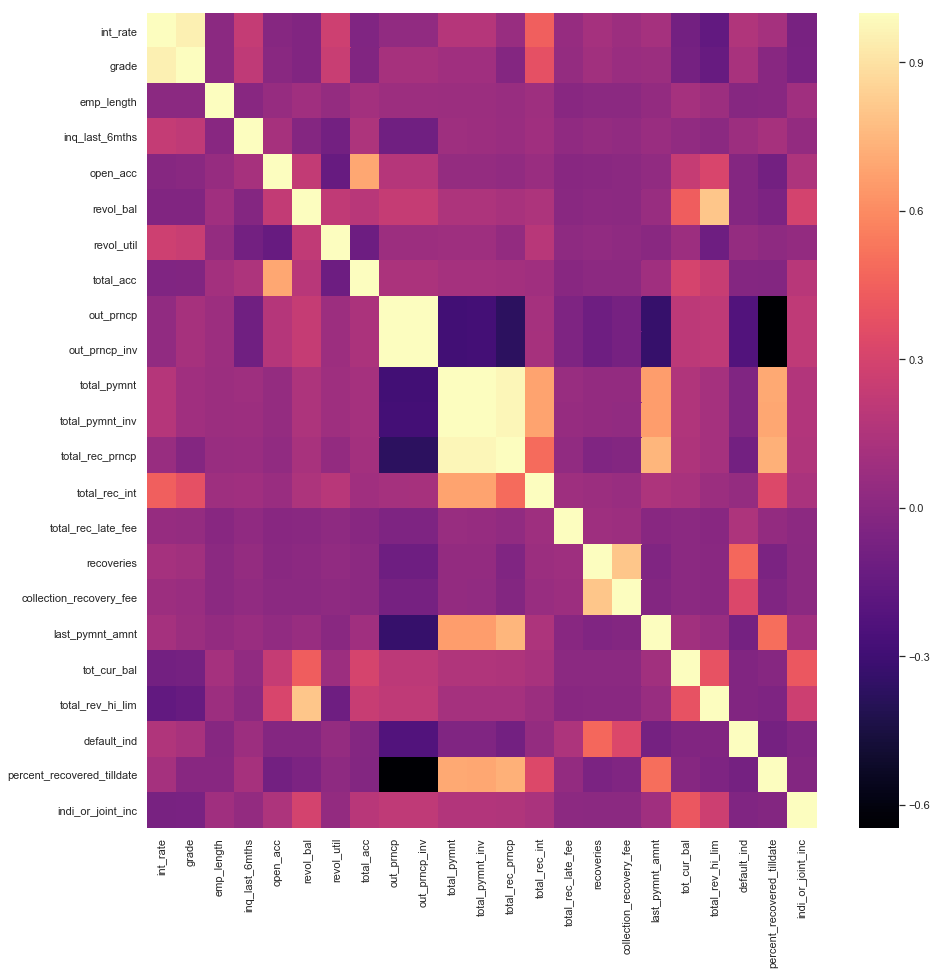

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(XYZ_data.corr(),annot=False,cmap='magma')

In [68]:
XYZ_data.shape

(855969, 33)

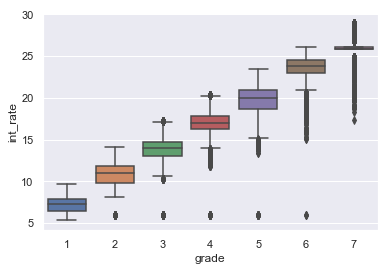

In [69]:
sns.boxplot('grade','int_rate',data=XYZ_data)

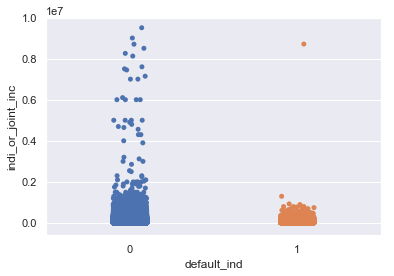

In [70]:
sns.stripplot('default_ind','indi_or_joint_inc',data=XYZ_data,jitter=True)

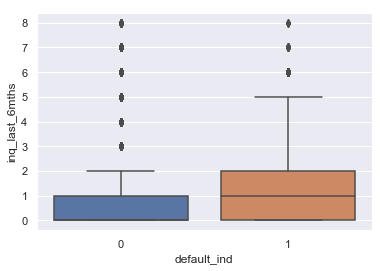

In [71]:
sns.boxplot('default_ind','inq_last_6mths',data=XYZ_data)

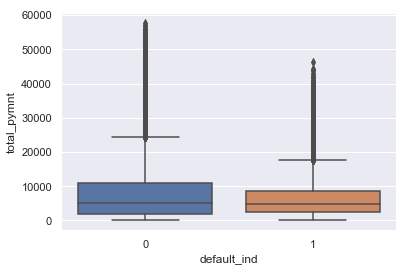

In [72]:
sns.boxplot('default_ind','total_pymnt',data=XYZ_data)

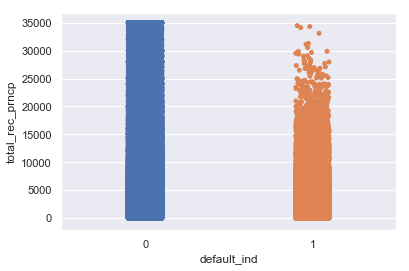

In [73]:
sns.stripplot('default_ind','total_rec_prncp',data=XYZ_data,jitter=True)#

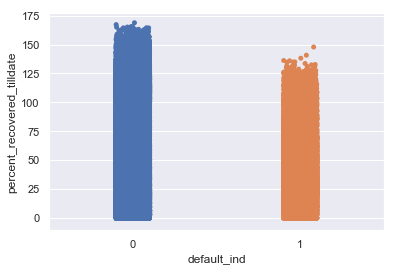

In [74]:
sns.stripplot('default_ind','percent_recovered_tilldate',data=XYZ_data,jitter=True)

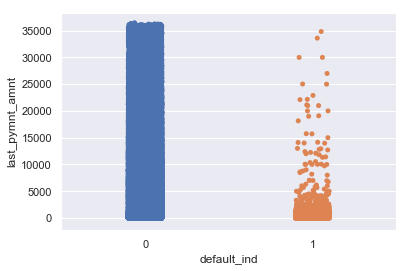

In [75]:
sns.stripplot('default_ind','last_pymnt_amnt',data=XYZ_data,jitter=True)

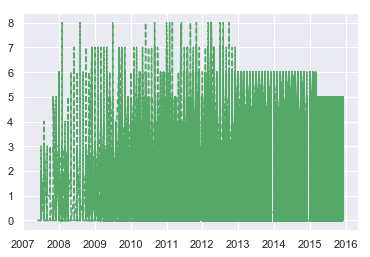

In [76]:
years = XYZ_data["issue_d"]
int = XYZ_data["inq_last_6mths"]

plt.plot(years, int, 'g--')

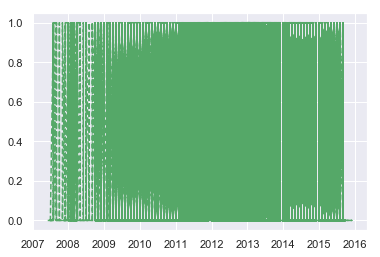

In [77]:
years = XYZ_data["issue_d"]
int = XYZ_data["default_ind"]

plt.plot(years, int, 'g--')

In [78]:
#one hot encoding for cateogorical data
nominal_columns = ["home_ownership", "verification_status", "purpose", "term", "initial_list_status", "application_type"]
dummy_df = pd.get_dummies(XYZ_data[nominal_columns])
XYZ_data = pd.concat([XYZ_data, dummy_df], axis=1)
XYZ_data = XYZ_data.drop(nominal_columns, axis=1)

In [79]:
XYZ_data.shape

(855969, 54)

In [80]:
XYZ_data['last']=XYZ_data['default_ind']
del XYZ_data['default_ind']
XYZ_data['default_ind']=XYZ_data['last']
del XYZ_data['last']
XYZ_data.head()

,int_rate,grade,emp_length,issue_d,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,percent_recovered_tilldate,indi_or_joint_inc,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,default_ind
0,10.65,2,10,2011-12-01,1985-01-01,1.0,3.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,139766.247529,32163.574526,117.221400,24000.0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,15.27,3,0,2011-12-01,1999-04-01,5.0,3.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,139766.247529,32163.574526,35.665200,30000.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
2,15.96,3,10,2011-12-01,2001-11-01,2.0,2.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,139766.247529,32163.574526,125.152083,12252.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
3,13.49,3,10,2011-12-01,1996-02-01,1.0,10.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,139766.247529,32163.574526,122.263000,49200.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
4,12.69,2,1,2011-12-01,1996-01-01,0.0,15.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,139766.247529,32163.574526,108.072333,80000.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0


In [81]:
XYZ_data = XYZ_data.drop(['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)

# Machine Learning Model Building

In [82]:
train = XYZ_data[XYZ_data['issue_d'] < '2015-6-01']
test = XYZ_data[XYZ_data['issue_d'] >= '2015-6-01']

In [83]:
XYZ_data = XYZ_data.drop(['issue_d'], axis=1)
train = train.drop(['issue_d'], axis=1)
test = test.drop(['issue_d'], axis=1)

In [84]:
print(train.shape)
print(test.shape)

(598978, 50)
(256991, 50)


In [85]:
X_train=train.iloc[:,:-1].values
Y_train=train.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
Y_test=test.iloc[:,-1].values

In [86]:
X=XYZ_data.iloc[:,:-1].values
Y=XYZ_data.iloc[:,-1].values

In [87]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [88]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=10)

In [90]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
Y_pred1=model1.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [93]:
print(confusion_matrix(Y_test,Y_pred1))

[[242508    174]
 [  3251  10858]]


In [94]:
print(accuracy_score(Y_test,Y_pred1))

0.986662305143093


In [95]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    242682
           1       0.98      0.77      0.86     14109

   micro avg       0.99      0.99      0.99    256791
   macro avg       0.99      0.88      0.93    256791
weighted avg       0.99      0.99      0.99    256791



In [96]:
from sklearn.ensemble import RandomForestClassifier
Model2 = RandomForestClassifier(n_estimators=10, criterion='entropy')
Model2.fit(X_train,Y_train)
Y_pred2=Model2.predict(X_test)
Y_pred_prob=Model2.predict_proba(X_test)

In [97]:
print(confusion_matrix(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))
print(accuracy_score(Y_test,Y_pred2))

[[242678      4]
 [   491  13618]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242682
           1       1.00      0.97      0.98     14109

   micro avg       1.00      1.00      1.00    256791
   macro avg       1.00      0.98      0.99    256791
weighted avg       1.00      1.00      1.00    256791

0.9980723623491478


In [102]:
from sklearn.ensemble import ExtraTreesClassifier

In [103]:
model4=(ExtraTreesClassifier(21))

In [104]:
model4=model4.fit(X_train, Y_train)

In [105]:
Y_pred4=model4.predict(X_test)

In [106]:
print(confusion_matrix(Y_test,Y_pred4))
print(accuracy_score(Y_test,Y_pred4))
print(classification_report(Y_test,Y_pred4))

[[242648     34]
 [   604  13505]]
0.9975154892500127
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242682
           1       1.00      0.96      0.98     14109

   micro avg       1.00      1.00      1.00    256791
   macro avg       1.00      0.98      0.99    256791
weighted avg       1.00      1.00      1.00    256791



Text(0, 0.5, 'Predictions')

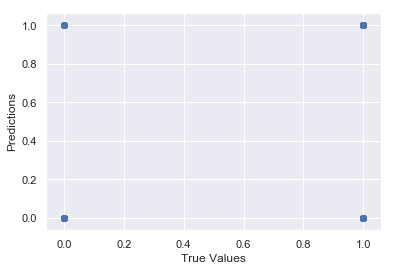

In [107]:
plt.scatter(Y_test, Y_pred2)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Cross Validation

In [112]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve



In [113]:
acc=cross_val_score(estimator=Model2,X=X_train,y=Y_train,cv=3)
acc.mean()

0.9980005941473151

# Roc Curve


In [114]:
y_pred_prob=Model2.predict_proba(X_test)

In [115]:
y_pred_prob1=y_pred_prob[:,1]

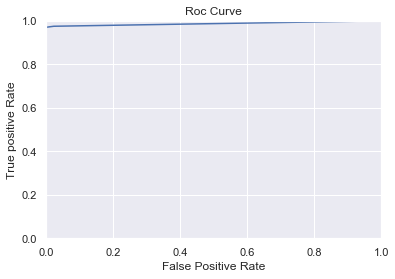

In [116]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob1)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Roc Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)